AAI-501 Final Project: Predicting Patient Sentiment in Drug Reviews

Some portions of this code were generated with ChatGPT (OpenAI, 2023) 

References:
OpenAI. (2023). ChatGPT (Mar 14 version) [Large language model]. https://chat.openai.com/chat

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load the training file 
drugs_training_data_path = "data/drugsComTrain_raw.tsv"
drugs_training_data = pd.read_csv(drugs_training_data_path , sep="\t")
print(drugs_training_data.head())
print(drugs_training_data.shape)

# laod the test file 
drugs_test_data_path = "data/drugsComTest_raw.tsv"
drugs_test_data = pd.read_csv(drugs_test_data_path , sep="\t")
drugs_test_data.head() 
print(drugs_test_data.shape)

   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           1

In [3]:
# Check for missing values
print("\nMissing values in training data:")
print(drugs_training_data.isnull().sum())

print("\nMissing values in test data:")
print(drugs_test_data.isnull().sum())


Missing values in training data:
Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Missing values in test data:
Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [28]:
# There is small portion, drop rows with missing condition
drugs_training_data = drugs_training_data.dropna(subset=['condition'])
drugs_test_data = drugs_test_data.dropna(subset=['condition'])


In [29]:
# Check for duplicates
print(f"\nDuplicates in training data: {drugs_training_data.duplicated().sum()}")
print(f"Duplicates in test data: {drugs_test_data.duplicated().sum()}")


Duplicates in training data: 0
Duplicates in test data: 0


In [30]:
# Summarize conditions
print("\nTop conditions in training data:")
print(drugs_training_data['condition'].value_counts().head(10))


Top conditions in training data:
condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64


In [87]:
print("\nTop conditions in test data:")
print(drugs_test_data['condition'].value_counts().head(10))


Top conditions in test data:
condition
Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: count, dtype: int64


In [86]:
print("\nTop drugs in training data:")
print(drugs_training_data['drugName'].value_counts())


Top drugs in training data:
drugName
Levonorgestrel                       3631
Etonogestrel                         3321
Ethinyl estradiol / norethindrone    2750
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2033
                                     ... 
Colace                                  1
DermaZinc Shampoo                       1
Lillow                                  1
Magaldrate / simethicone                1
Grifulvin V                             1
Name: count, Length: 3431, dtype: int64


Of the top ten drugs, 7 of them are contraceptives. There are 3436 unqiue drug counts

In [33]:
# Summarize ratings distribution
print("\nRatings distribution in training data:")
print(drugs_training_data['rating'].value_counts())

print("\nRatings distribution in test data:")
print(drugs_test_data['rating'].value_counts())


Ratings distribution in training data:
rating
10.0    50745
9.0     27379
1.0     21504
8.0     18791
7.0      9395
5.0      7959
2.0      6879
3.0      6465
6.0      6301
4.0      4980
Name: count, dtype: int64

Ratings distribution in test data:
rating
10.0    16937
9.0      9120
1.0      7265
8.0      6118
7.0      3075
5.0      2691
2.0      2324
3.0      2197
6.0      2102
4.0      1642
Name: count, dtype: int64


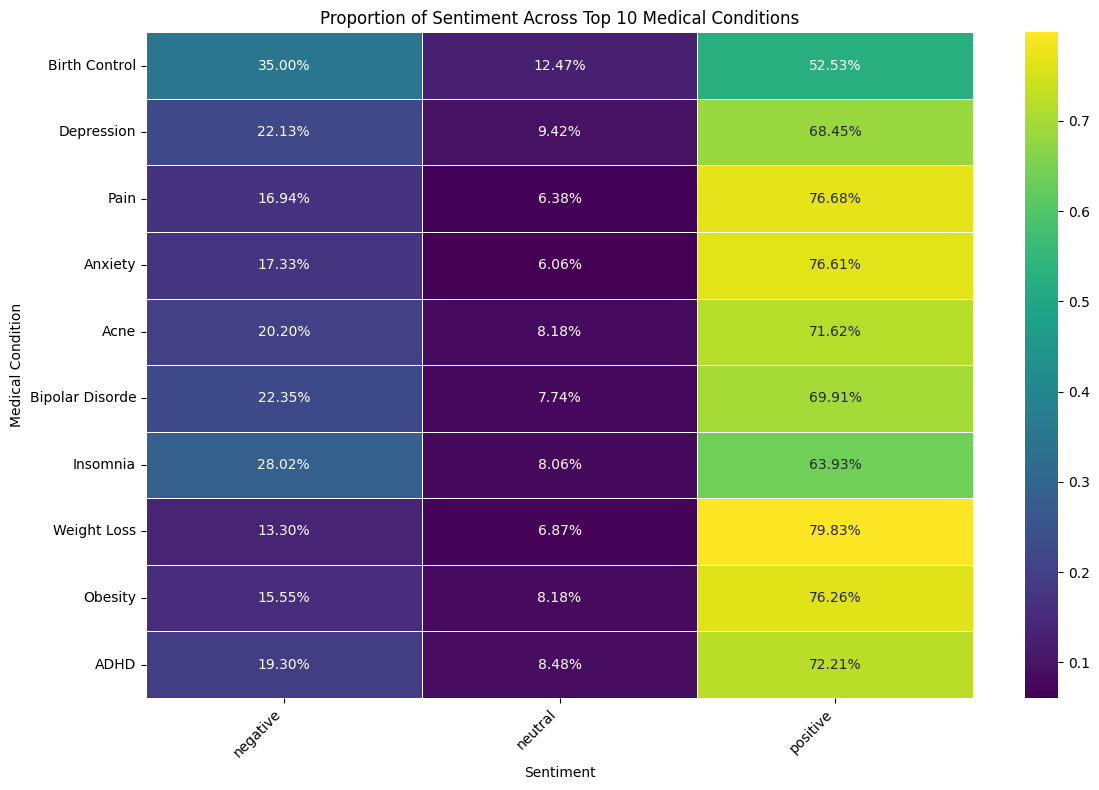

sentiment        negative   neutral  positive
condition                                    
Birth Control    0.350042  0.124670  0.525288
Depression       0.221303  0.094167  0.684530
Pain             0.169406  0.063792  0.766802
Anxiety          0.173272  0.060637  0.766091
Acne             0.202040  0.081782  0.716178
Bipolar Disorde  0.223485  0.077415  0.699100
Insomnia         0.280152  0.080588  0.639259
Weight Loss      0.133001  0.068717  0.798282
Obesity          0.155549  0.081839  0.762612
ADHD             0.193024  0.084836  0.722140


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the condition column
drugs_training_data['condition'] = drugs_training_data['condition'].str.strip()

# Group by 'condition' and calculate the proportion of each sentiment category
condition_summary = drugs_training_data.groupby('condition')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Get top 10 conditions by total number of reviews
condition_counts = drugs_training_data['condition'].value_counts()
top_10_conditions = condition_counts.head(10).index
condition_summary = condition_summary.loc[top_10_conditions]


plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the proportion of each sentiment by condition
sns.heatmap(condition_summary, annot=True, fmt=".2%", cmap='viridis', linewidths=.5)
plt.xlabel('Sentiment')
plt.ylabel('Medical Condition')
plt.title('Proportion of Sentiment Across Top 10 Medical Conditions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the summary for reference
print(condition_summary)

Preprocess the reviews for classification models

In [34]:
# preprocess the reviews
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('all')

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_review(review):
    # Remove special characters and numbers
    review = re.sub(r"[^a-zA-Z\s]", "", review)
    # Convert to lowercase
    review = review.lower()
    # Tokenize
    words = word_tokenize(review)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join back into a single string
    return " ".join(words)

# Apply preprocessing to the review column
drugs_training_data['cleaned_review'] = drugs_training_data['review'].apply(preprocess_review)
drugs_test_data['cleaned_review'] = drugs_test_data['review'].apply(preprocess_review)

# Preview the cleaned reviews
print("\nSample cleaned reviews (training data):")
print(drugs_training_data[['review', 'cleaned_review']].head())

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/bosky/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/bosky/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/bosky/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/bosky/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/bosky/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_dat


Sample cleaned reviews (training data):
                                              review  \
0  "It has no side effect, I take it in combinati...   
1  "My son is halfway through his fourth week of ...   
2  "I used to take another oral contraceptive, wh...   
3  "This is my first time using any form of birth...   
4  "Suboxone has completely turned my life around...   

                                      cleaned_review  
0  side effect take combination bystolic mg fish oil  
1  son halfway fourth week intuniv became concern...  
2  used take another oral contraceptive pill cycl...  
3  first time using form birth control im glad we...  
4  suboxone completely turned life around feel he...  


In [36]:
# Define function to map ratings to sentiment labels
def label_sentiment(rating):
    if rating >= 7:
        return "positive"
    elif rating > 4 and rating < 7:
        return "neutral"
    else:
        return "negative"

# Apply the labeling function to the 'rating' column
drugs_training_data['sentiment'] = drugs_training_data['rating'].apply(label_sentiment)
drugs_test_data['sentiment'] = drugs_test_data['rating'].apply(label_sentiment)

# Preview the labeled data
print("\nSentiment distribution in training data:")
print(drugs_training_data['sentiment'].value_counts())

print("\nSentiment distribution in test data:")
print(drugs_test_data['sentiment'].value_counts())

print("\nSample labeled reviews (training data):")
print(drugs_training_data[['cleaned_review', 'rating', 'sentiment']].head())


Sentiment distribution in training data:
sentiment
positive    106310
negative     39828
neutral      14260
Name: count, dtype: int64

Sentiment distribution in test data:
sentiment
positive    35250
negative    13428
neutral      4793
Name: count, dtype: int64

Sample labeled reviews (training data):
                                      cleaned_review  rating sentiment
0  side effect take combination bystolic mg fish oil     9.0  positive
1  son halfway fourth week intuniv became concern...     8.0  positive
2  used take another oral contraceptive pill cycl...     5.0   neutral
3  first time using form birth control im glad we...     8.0  positive
4  suboxone completely turned life around feel he...     9.0  positive


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features

# Transform reviews into TF-IDF features
X_train = tfidf_vectorizer.fit_transform(drugs_training_data['cleaned_review'])
X_test = tfidf_vectorizer.transform(drugs_test_data['cleaned_review'])

# Encode sentiment labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(drugs_training_data['sentiment'])
y_test = label_encoder.transform(drugs_test_data['sentiment'])

# Split the training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes of datasets
print("Training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (128318, 5000)
Validation set shape: (32080, 5000)
Test set shape: (53471, 5000)


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
# Naive Bayes
nb_model = MultinomialNB()
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Naïve Bayes model
nb_model.fit(X_train_final, y_train_final)
nb_val_preds = nb_model.predict(X_val)

# Train Random Forest model
rf_model.fit(X_train_final, y_train_final)
rf_val_preds = rf_model.predict(X_val)

# Evaluate Naive Bayes
print("\nNaive Bayes Classification Report (Validation Set):")
print(classification_report(y_val, nb_val_preds, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_val, nb_val_preds))


# Evaluate Random Forest
print("\nRandom Forest Classification Report (Validation Set):")
print(classification_report(y_val, rf_val_preds, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_val, rf_val_preds))


Naive Bayes Classification Report (Validation Set):
              precision    recall  f1-score   support

    negative       0.77      0.34      0.47      7867
     neutral       0.00      0.00      0.00      2923
    positive       0.73      0.98      0.84     21290

    accuracy                           0.73     32080
   macro avg       0.50      0.44      0.44     32080
weighted avg       0.67      0.73      0.67     32080

Accuracy: 0.7334164588528679

Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

    negative       0.91      0.69      0.78      7867
     neutral       1.00      0.48      0.65      2923
    positive       0.85      0.99      0.91     21290

    accuracy                           0.87     32080
   macro avg       0.92      0.72      0.78     32080
weighted avg       0.88      0.87      0.86     32080

Accuracy: 0.8658977556109726


/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Random forest performs better. However the neutral category is very poor. Negative is worse than positive. Lets examien the balance of the sentiment score

/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_27392/37971365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=drugs_training_data, palette="Set2")
/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_27392/37971365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=drugs_test_data, palette="Set2")


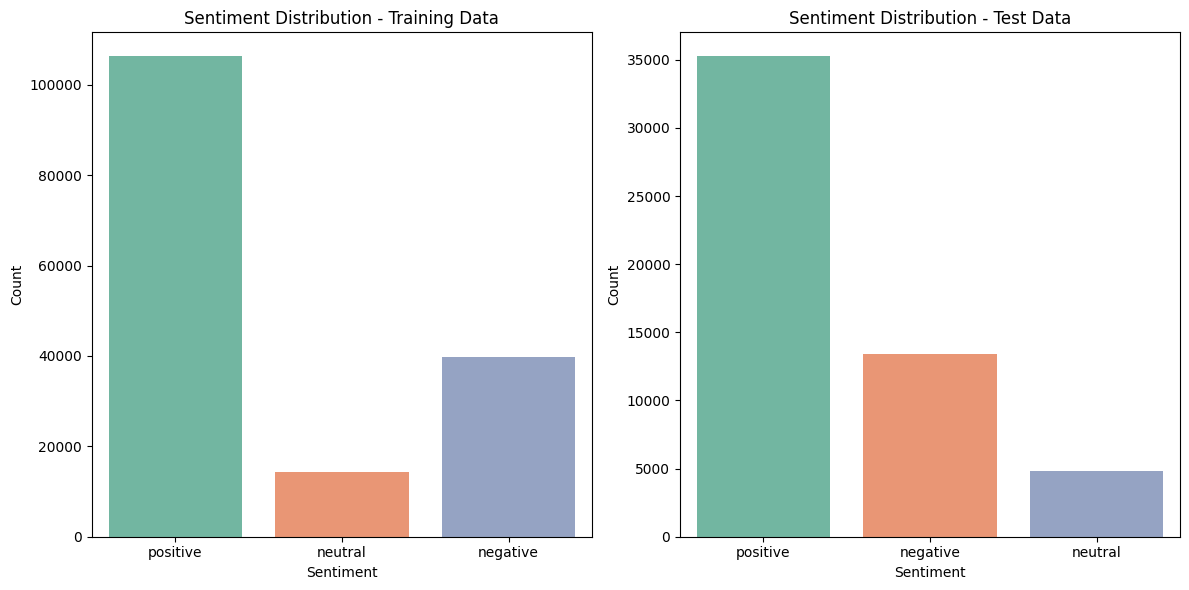

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution in training and test datasets
plt.figure(figsize=(12, 6))

# Training data sentiment distribution
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=drugs_training_data, palette="Set2")
plt.title("Sentiment Distribution - Training Data")
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Test data sentiment distribution
plt.subplot(1, 2, 2)
sns.countplot(x='sentiment', data=drugs_test_data, palette="Set2")
plt.title("Sentiment Distribution - Test Data")
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Heavily skewed toward positive. Lets try adding balanced parameter to random forest to see if we can improve its performance...

In [41]:
# Initialize Random Forest model with class weights
rf_model_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model with class weights
rf_model_weighted.fit(X_train_final, y_train_final)
rf_val_preds_weighted = rf_model_weighted.predict(X_val)

# Evaluate the weighted Random Forest model
print("\nRandom Forest with Class Weights - Classification Report (Validation Set):")
print(classification_report(y_val, rf_val_preds_weighted, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_val, rf_val_preds_weighted))


Random Forest with Class Weights - Classification Report (Validation Set):
              precision    recall  f1-score   support

    negative       0.91      0.69      0.78      7867
     neutral       0.99      0.48      0.65      2923
    positive       0.85      0.98      0.91     21290

    accuracy                           0.86     32080
   macro avg       0.92      0.72      0.78     32080
weighted avg       0.87      0.86      0.85     32080

Accuracy: 0.8646508728179552


Minor improvement in performance. Lets try synthetic sampling to increase performance: 

In [42]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train_final)

# Train Random Forest model on SMOTE-balanced data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the Random Forest model trained on SMOTE data
rf_val_preds_smote = rf_model_smote.predict(X_val)

print("\nRandom Forest with SMOTE - Classification Report (Validation Set):")
print(classification_report(y_val, rf_val_preds_smote, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_val, rf_val_preds_smote))


Random Forest with SMOTE - Classification Report (Validation Set):
              precision    recall  f1-score   support

    negative       0.86      0.72      0.78      7867
     neutral       0.85      0.49      0.62      2923
    positive       0.86      0.96      0.91     21290

    accuracy                           0.86     32080
   macro avg       0.86      0.72      0.77     32080
weighted avg       0.86      0.86      0.85     32080

Accuracy: 0.8576371571072319


In [49]:
# Also do Naiive Bayes with SMOTE

nb_model_smote = MultinomialNB()
nb_model_smote.fit(X_train_smote, y_train_smote)

# Predict on validation set
nb_val_preds_smote = nb_model_smote.predict(X_val)

# Evaluate Naïve Bayes with SMOTE
print("\nNaive Bayes with SMOTE - Classification Report (Validation Set):")
print(classification_report(y_val, nb_val_preds_smote, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_val, nb_val_preds_smote))



Naive Bayes with SMOTE - Classification Report (Validation Set):
              precision    recall  f1-score   support

    negative       0.62      0.62      0.62      7867
     neutral       0.18      0.49      0.26      2923
    positive       0.88      0.68      0.76     21290

    accuracy                           0.65     32080
   macro avg       0.56      0.59      0.55     32080
weighted avg       0.75      0.65      0.68     32080

Accuracy: 0.6453553615960099


In [50]:
# Predict on test set
nb_test_preds = nb_model.predict(X_test)

# Evaluate Naïve Bayes with SMOTE on test set
print("\nNaive Bayes without SMOTE - Classification Report (Test Set):")
print(classification_report(y_test, nb_test_preds, target_names=label_encoder.classes_))
print("Accuracy on Test Set:", accuracy_score(y_test, nb_test_preds))


Naive Bayes without SMOTE - Classification Report (Test Set):
              precision    recall  f1-score   support

    negative       0.77      0.35      0.48     13428
     neutral       0.00      0.00      0.00      4793
    positive       0.73      0.98      0.83     35250

    accuracy                           0.73     53471
   macro avg       0.50      0.44      0.44     53471
weighted avg       0.67      0.73      0.67     53471

Accuracy on Test Set: 0.7328458416711863


/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Naive Bayes performance worse with SMOTE. Lets run the Naive best without SMOTE on Test set. 

For Random Forests: lets try some hyperparameter turning to see if we can acheive better results

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),         # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of trees
    'min_samples_split': randint(2, 10),      # Minimum samples to split a node
    'min_samples_leaf': randint(1, 10),       # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider
    'class_weight': ['balanced', None]        # Adjust for class imbalance
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist, 
    n_iter=50,            # Number of random combinations to try
    cv=5,                 # 5-fold cross-validation
    verbose=2, 
    n_jobs=-1,            # Use all available cores
    random_state=42,      # For reproducibility
    scoring='accuracy'    # Optimize for accuracy
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters from RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model from RandomizedSearchCV on the validation set
best_rf_model = random_search.best_estimator_
rf_val_preds_tuned = best_rf_model.predict(X_val)

# Print classification report for the tuned model
print("\nRandom Forest with RandomizedSearchCV - Classification Report (Validation Set):")
print(classification_report(y_val, rf_val_preds_tuned, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_val, rf_val_preds_tuned))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   0.3s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=  20.8s
[CV] END class_weight=balanced, max_depth=20, max_features=log2, min_s

/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=357; total time= 2.4min
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=357; total time= 2.4min
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=154; total time=   9.8s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=154; total time=   9.7s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=406; total time=   0.1s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=406; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=406; total time=   0.0s
[

/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/bosky/boskymsaiicoursework/.venv/lib/python3.11/site-packages/sklearn/base.py", line 666, i

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 364}

Random Forest with RandomizedSearchCV - Classification Report (Validation Set):
              precision    recall  f1-score   support

    negative       0.84      0.69      0.76      7867
     neutral       0.88      0.47      0.62      2923
    positive       0.85      0.96      0.90     21290

    accuracy                           0.85     32080
   macro avg       0.86      0.71      0.76     32080
weighted avg       0.85      0.85      0.84     32080

Accuracy: 0.8505922693266833


In [44]:
# Use the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Predict on the test set
rf_test_preds = best_rf_model.predict(X_test)

# Evaluate the predictions using classification report
print("\nRandom Forest with RandomizedSearchCV - Classification Report (Test Set):")
print(classification_report(y_test, rf_test_preds, target_names=label_encoder.classes_))

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test, rf_test_preds)
print("Accuracy on Test Set:", test_accuracy)


Random Forest with RandomizedSearchCV - Classification Report (Test Set):
              precision    recall  f1-score   support

    negative       0.86      0.70      0.77     13428
     neutral       0.88      0.47      0.61      4793
    positive       0.85      0.96      0.90     35250

    accuracy                           0.85     53471
   macro avg       0.86      0.71      0.76     53471
weighted avg       0.85      0.85      0.84     53471

Accuracy on Test Set: 0.8503861906453966


The neutral class remains challenging, with lower recall (indicating missed predictions for neutral sentiment).
The positive class continues to dominate predictions, but the model still handles minority classes